In [2]:
%matplotlib inline
from scipy import stats
import numpy as np
import pandas as pd
import missingno as mg
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
# box-cox变换用到
from scipy.stats import boxcox_normmax
from scipy.special import boxcox1p
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,losses,optimizers,metrics

# 忽略警告
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
# 加载数据集
train = pd.read_csv('./train.csv',header=0,index_col=0)
test = pd.read_csv('./test.csv',header=0,index_col=0)
# 以 f开头表示在字符串内支持大括号内的python 表达式，与常见的以r开头是同一类用法，只不过以r开头是去掉反斜杠机制
print (f"Train has {train.shape[0]} rows and {train.shape[1]} columns")
print (f"Test has {test.shape[0]} rows and {test.shape[1]} columns")

Train has 1460 rows and 80 columns
Test has 1459 rows and 79 columns


In [4]:
# 关于数值变量的统计信息
train.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [6]:
# 统计不同类型对象的个数
train.dtypes.value_counts()

object     43
int64      34
float64     3
dtype: int64

<AxesSubplot:>

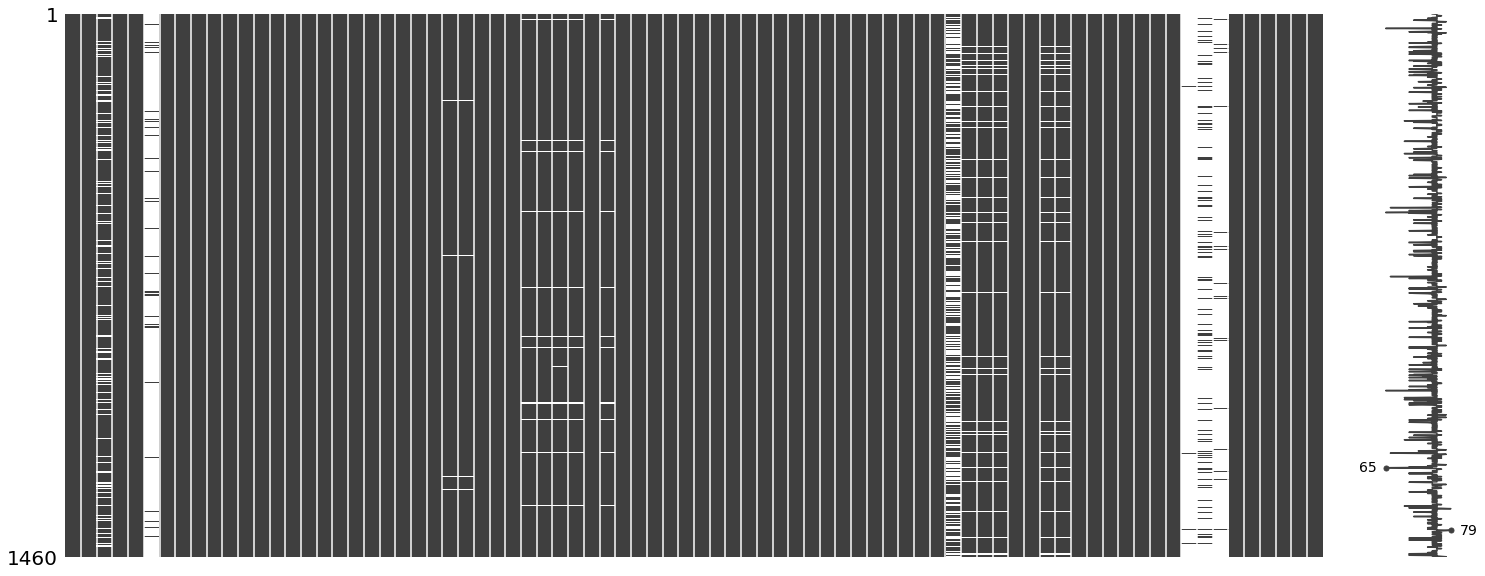

In [7]:
# 使用missingno进行缺失值可视化
mg.matrix(train)

In [8]:
# 定义一个统计每个变量缺失比例的函数
def missing_percentage(df):
    total = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
    percentage = round(df.isnull().sum().sort_values(ascending=False)*100 / len(df),2)[df.isnull().sum().sort_values(ascending=False)*100 / len(df) != 0]
    return pd.concat([total,percentage],axis = 1,keys=['Total','Percentage'])

missing_percentage(train)

,Total,Percentage
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageYrBlt,81,5.55
GarageCond,81,5.55
GarageType,81,5.55
GarageFinish,81,5.55


<AxesSubplot:>

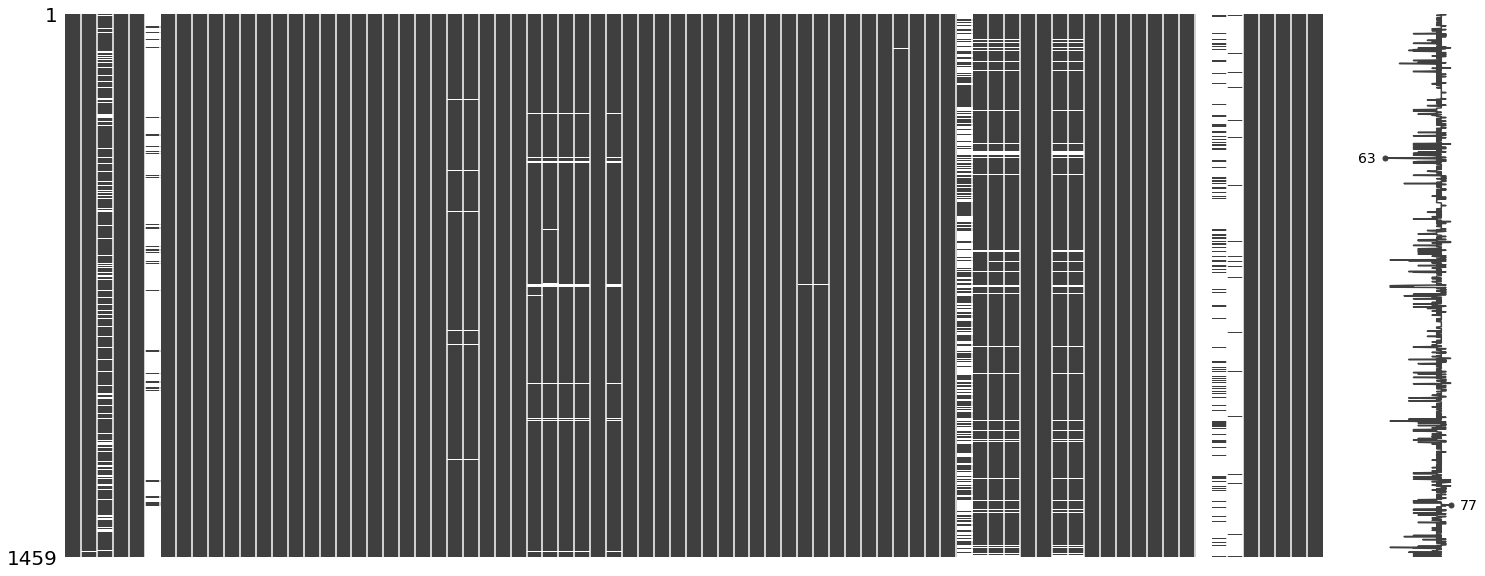

In [9]:
mg.matrix(test)

In [10]:
missing_percentage(test)

,Total,Percentage
PoolQC,1456,99.79
MiscFeature,1408,96.50
Alley,1352,92.67
Fence,1169,80.12
FireplaceQu,730,50.03
LotFrontage,227,15.56
GarageYrBlt,78,5.35
GarageFinish,78,5.35
GarageQual,78,5.35
GarageCond,78,5.35


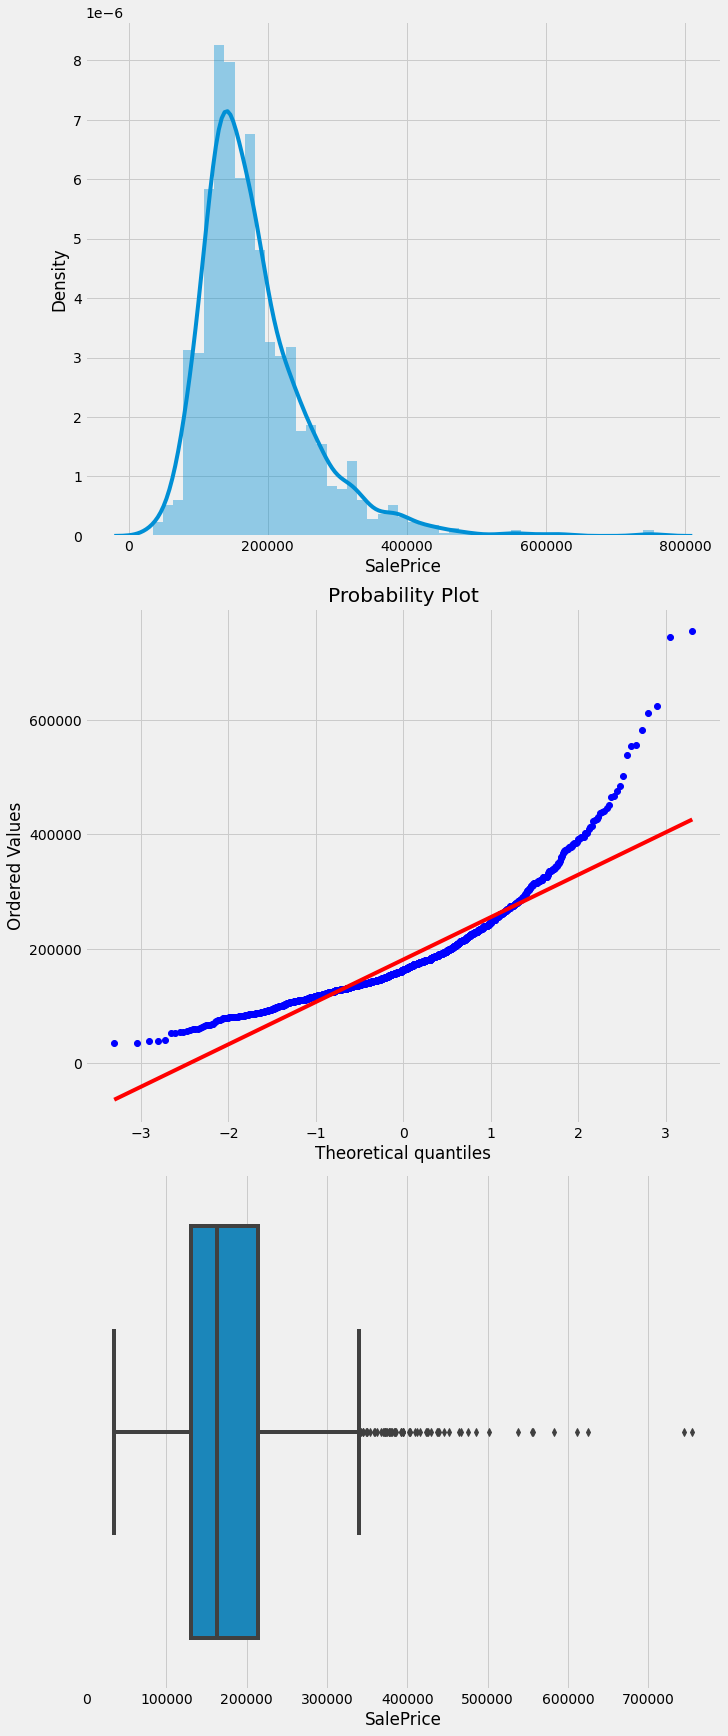

In [11]:
def plot_1(df,feature):
    # 一种图的格式
    style.use('fivethirtyeight')
    fig,axes = plt.subplots(3,1,constrained_layout=True,figsize=(10,24))
    # 画直方图与连续概率密度估计图
    # norm_hist=True:如果为True，则直方图的高度显示密度而不是计数
    sns.distplot(df.loc[:,feature],norm_hist=True,ax=axes[0])
    
    # 通过比较数据和正态分布的分位数是否相等来判断数据是不是符合正态分布
    stats.probplot(df.loc[:,feature],plot=axes[1])
    
    # 箱型图
    sns.boxplot(df.loc[:,feature],orient='h',ax=axes[2])
    

plot_1(train,'SalePrice')

In [12]:
train.SalePrice.skew(),train.SalePrice.kurtosis()

(1.8828757597682129, 6.536281860064529)

In [15]:
(train.corr()**2)["SalePrice"].sort_values(ascending=False)[1:]

OverallQual      0.625652
GrLivArea        0.502149
GarageCars       0.410124
GarageArea       0.388667
TotalBsmtSF      0.376481
1stFlrSF         0.367057
FullBath         0.314344
TotRmsAbvGrd     0.284860
YearBuilt        0.273422
YearRemodAdd     0.257151
GarageYrBlt      0.236548
MasVnrArea       0.228000
Fireplaces       0.218023
BsmtFinSF1       0.149320
LotFrontage      0.123763
WoodDeckSF       0.105244
2ndFlrSF         0.101974
OpenPorchSF      0.099765
HalfBath         0.080717
LotArea          0.069613
BsmtFullBath     0.051585
BsmtUnfSF        0.046001
BedroomAbvGr     0.028296
KitchenAbvGr     0.018471
EnclosedPorch    0.016532
ScreenPorch      0.012420
PoolArea         0.008538
MSSubClass       0.007104
OverallCond      0.006062
MoSold           0.002156
3SsnPorch        0.001988
YrSold           0.000837
LowQualFinSF     0.000656
MiscVal          0.000449
BsmtHalfBath     0.000284
BsmtFinSF2       0.000129
Name: SalePrice, dtype: float64

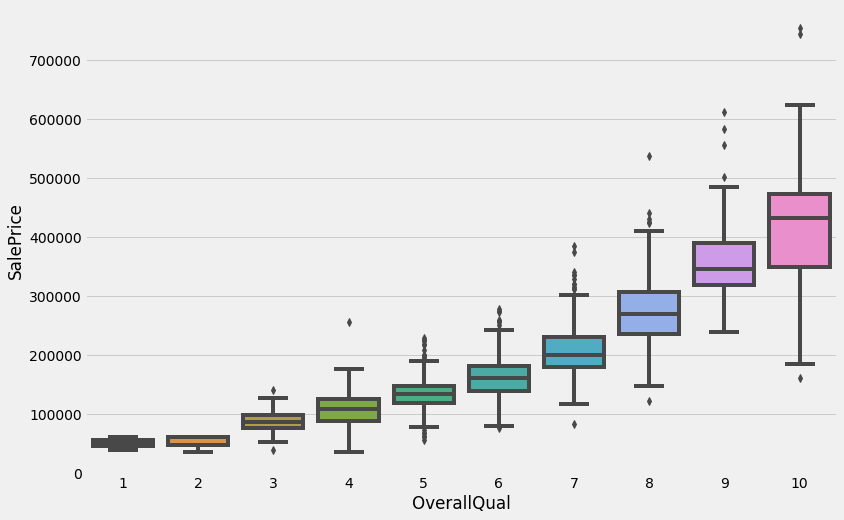

In [16]:
# 箱型图适合类别变量，这是为类别变量定制的
def customized_cat_boxplot(y, x):
    style.use('fivethirtyeight')
    plt.subplots(figsize=(12,8))
    sns.boxplot(y=y,x=x)

customized_cat_boxplot(train.SalePrice, train.OverallQual)

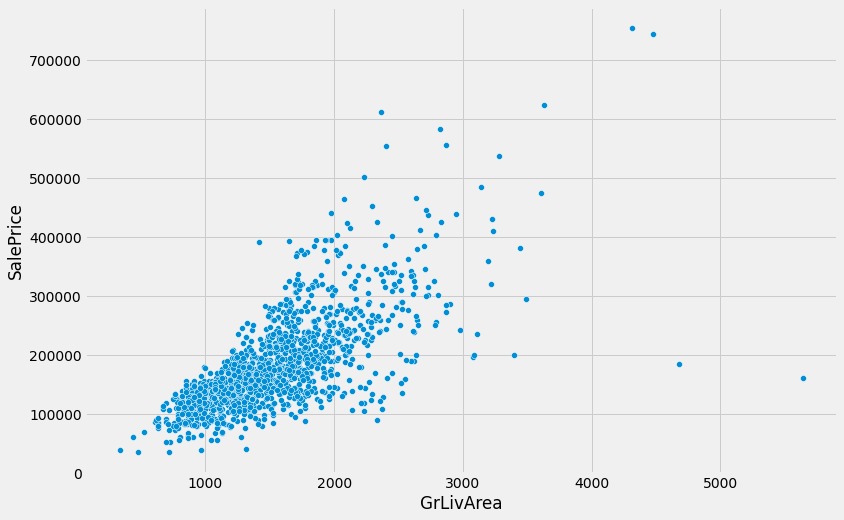

In [27]:
# 散点图适合连续变量，这是为连续变量定制的
def customized_num_scatterplot(y, x):
    style.use('fivethirtyeight')
    plt.subplots(figsize=(12,8))
    sns.scatterplot(y=y,x=x)

customized_num_scatterplot(train.SalePrice, train.GrLivArea)

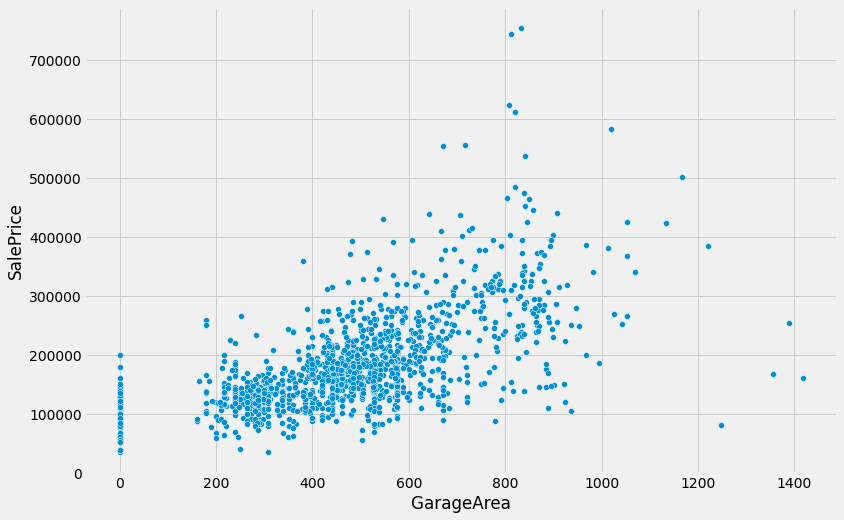

In [28]:
customized_num_scatterplot(train.SalePrice, train.GarageArea)

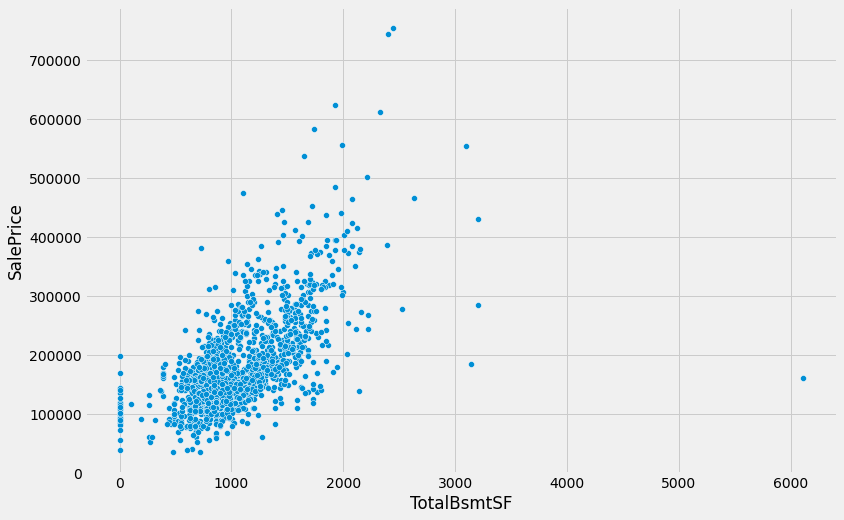

In [29]:
customized_num_scatterplot(train.SalePrice, train.TotalBsmtSF)

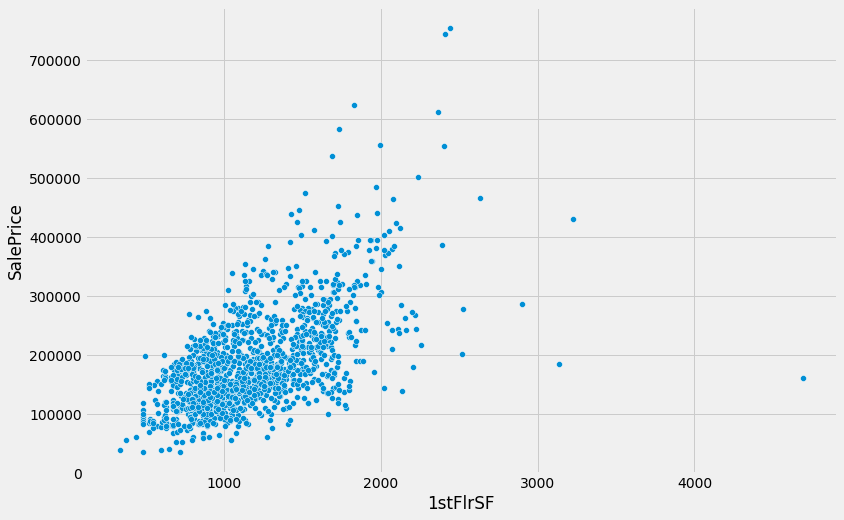

In [30]:
customized_num_scatterplot(train.SalePrice, train['1stFlrSF'])

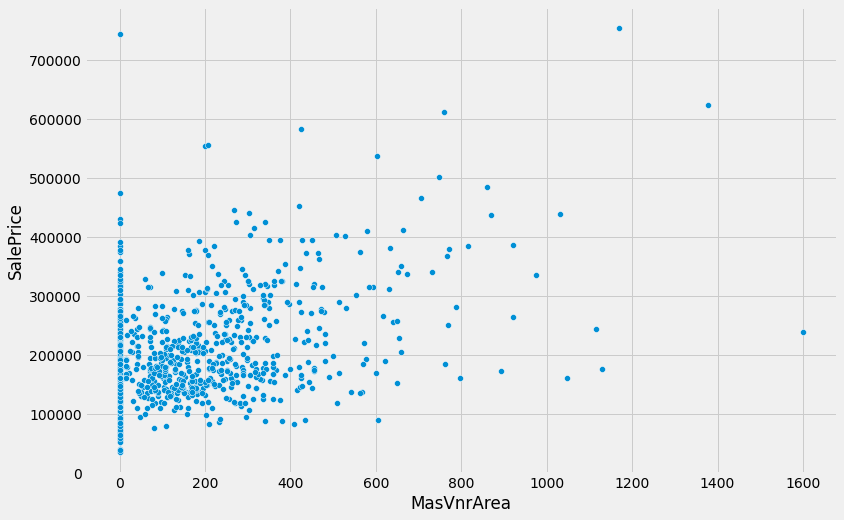

In [31]:
customized_num_scatterplot(train.SalePrice, train.MasVnrArea)

In [32]:
# 删除这两个异常值
train = train[train.GrLivArea < 4500]
# 此时发现:TotalBsmtSF中的异常点也在其中,1stFlrSF中的异常点也在其中。并且最关键的问题是索引不连续了，此时就要重置索引
train.reset_index(drop = True, inplace = True)
previous_train = train.copy()

<AxesSubplot:xlabel='MasVnrArea', ylabel='SalePrice'>

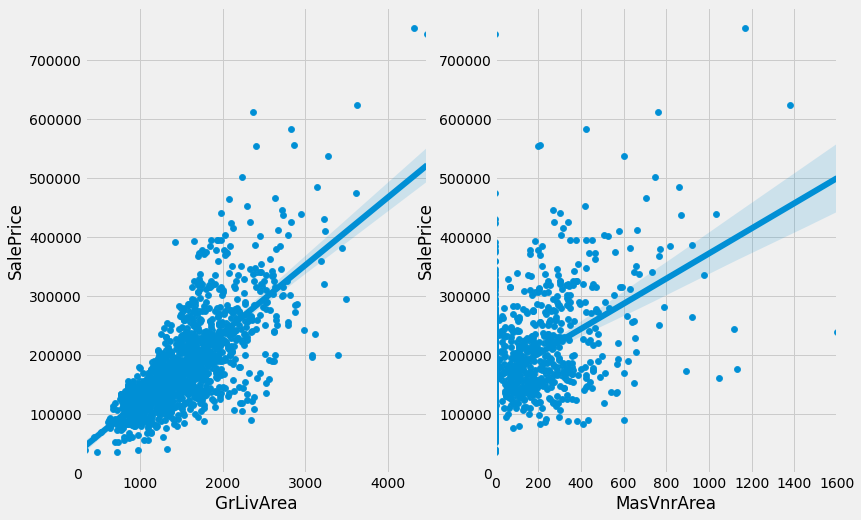

In [33]:
fig, (ax1, ax2) = plt.subplots(figsize = (12,8), ncols=2,sharey=False)
# Scatter plotting for SalePrice and GrLivArea. 
sns.scatterplot( x = train.GrLivArea, y = train.SalePrice,  ax=ax1)
# Putting a regression line. 
sns.regplot(x=train.GrLivArea, y=train.SalePrice, ax=ax1)

# Scatter plotting for SalePrice and MasVnrArea. 
sns.scatterplot(x = train.MasVnrArea,y = train.SalePrice, ax=ax2)
# regression line for MasVnrArea and SalePrice. 
sns.regplot(x=train.MasVnrArea, y=train.SalePrice, ax=ax2)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

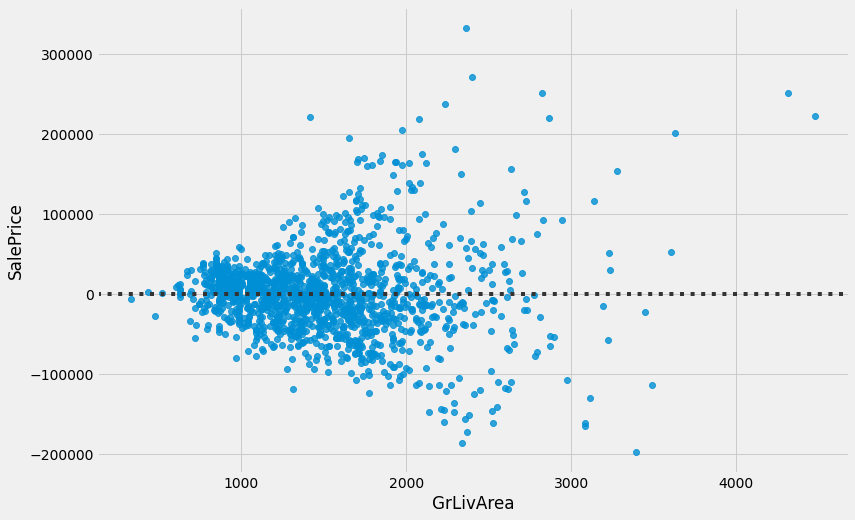

In [34]:
plt.subplots(figsize = (12,8))
sns.residplot(train.GrLivArea, train.SalePrice)

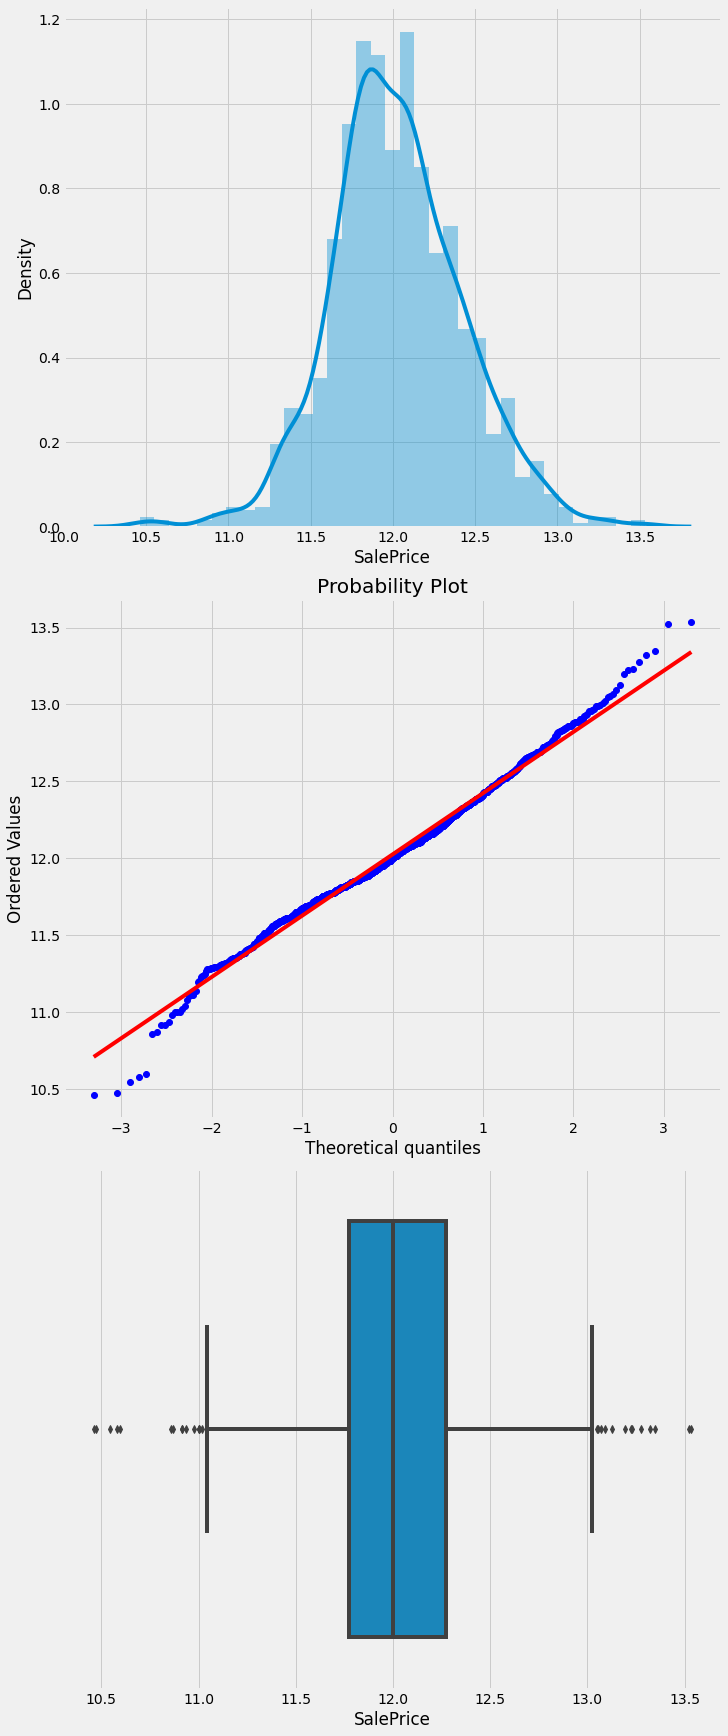

In [35]:
# 对数变换
train['SalePrice'] = np.log1p(train['SalePrice'])
# 检验其正态性
plot_1(train,'SalePrice')

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

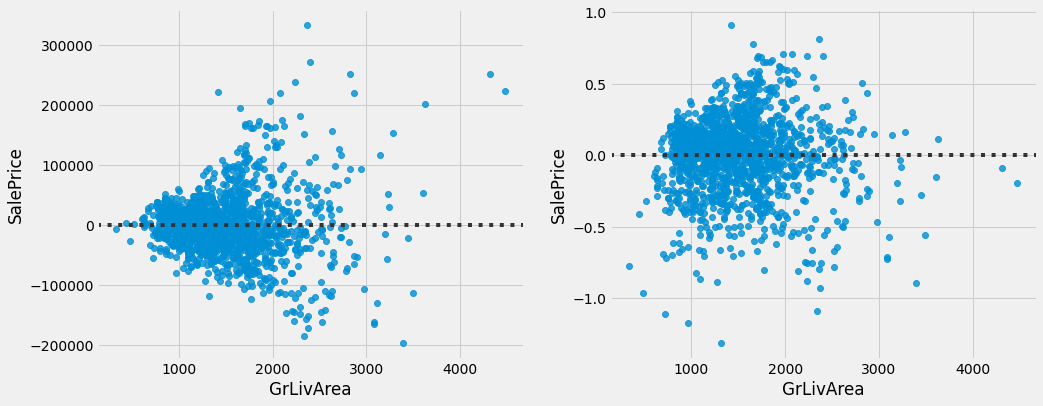

In [36]:
## Customizing grid for two plots. 
fig, (ax1, ax2) = plt.subplots(figsize = (15,6), 
                               ncols=2, 
                               sharey = False, 
                               sharex=False
                              )
## doing the first scatter plot. 
sns.residplot(x = previous_train.GrLivArea, y = previous_train.SalePrice, ax = ax1)
## doing the scatter plot for GrLivArea and SalePrice. 
sns.residplot(x = train.GrLivArea, y = train.SalePrice, ax = ax2)

Text(0.5, 1.0, 'Heatmap of all the Features')

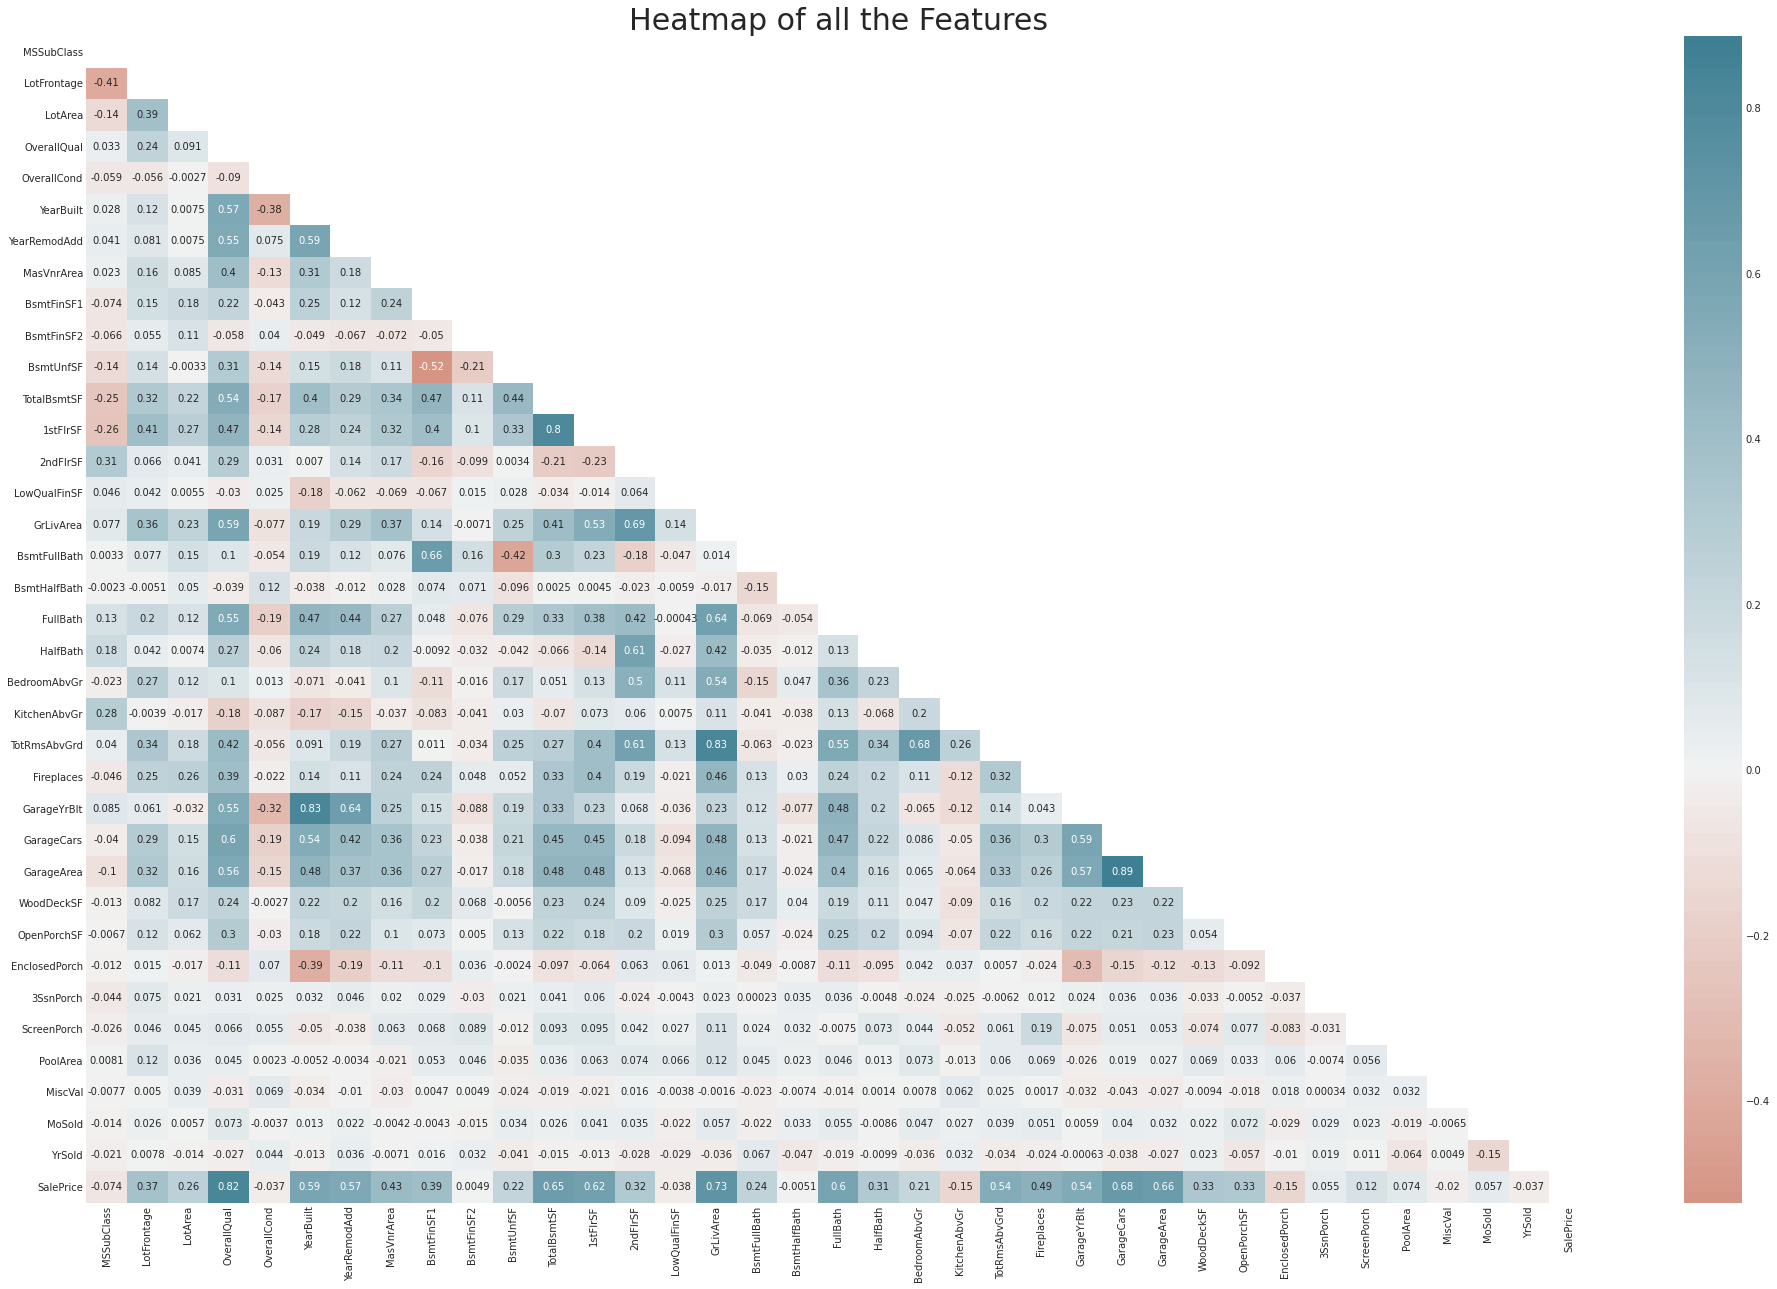

In [37]:
# Plot fig sizing. 
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (30,20))
# Plotting heatmap. 

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(train.corr(), 
            cmap=sns.diverging_palette(20, 220, n=200), 
            mask = mask, 
            annot=True, 
            center = 0, 
           )
# Give title. 
plt.title("Heatmap of all the Features", fontsize = 30)

In [38]:
# Saving the target values in "y_train". 
y = train['SalePrice'].reset_index(drop=True)

# getting a copy of train
previous_train = train.copy()

In [39]:
# Combining train and test datasets together so that we can do all the work at once. 
all_data = pd.concat((train, test)).reset_index(drop = True)
# Dropping the target variable. 
all_data.drop(['SalePrice'], axis = 1, inplace = True)

In [40]:
missing_percentage(all_data)

,Total,Percentage
PoolQC,2908,99.69
MiscFeature,2812,96.40
Alley,2719,93.21
Fence,2346,80.43
FireplaceQu,1420,48.68
LotFrontage,486,16.66
GarageYrBlt,159,5.45
GarageFinish,159,5.45
GarageQual,159,5.45
GarageCond,159,5.45


In [41]:
missing_val_col = ["Alley", 
                   "PoolQC", 
                   "MiscFeature",
                   "Fence",
                   "FireplaceQu",
                   "GarageType",
                   "GarageFinish",
                   "GarageQual",
                   "GarageCond",
                   'BsmtQual',
                   'BsmtCond',
                   'BsmtExposure',
                   'BsmtFinType1',
                   'BsmtFinType2',
                   'MasVnrType']

for i in missing_val_col:
    all_data[i] = all_data[i].fillna('None')

In [42]:
missing_val_col2 = ['BsmtFinSF1',
                    'BsmtFinSF2',
                    'BsmtUnfSF',
                    'TotalBsmtSF',
                    'BsmtFullBath', 
                    'BsmtHalfBath', 
                    'GarageYrBlt',
                    'GarageArea',
                    'GarageCars',
                    'MasVnrArea']

for i in missing_val_col2:
    all_data[i] = all_data[i].fillna(0)

In [43]:
# 将'Neighborhood'分桶，用对应桶内'LotFrontage'的均值来填充缺失值
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform( lambda x: x.fillna(x.mean()))

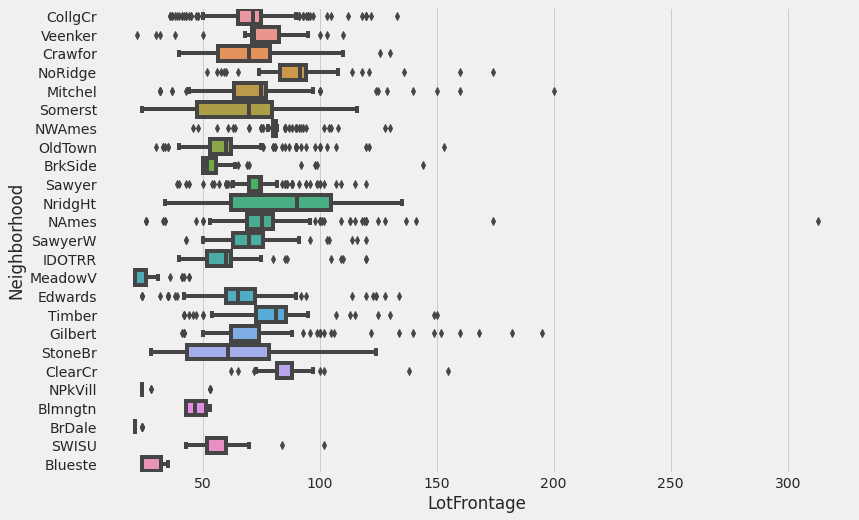

In [48]:
customized_cat_boxplot(all_data.Neighborhood, all_data.LotFrontage)

In [49]:
all_data.Neighborhood.unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [50]:
all_data.LotFrontage.unique()

array([ 65.        ,  80.        ,  68.        ,  60.        ,
        84.        ,  85.        ,  75.        ,  81.51764706,
        51.        ,  50.        ,  70.        ,  74.55102041,
        91.        ,  75.21066667,  72.        ,  66.        ,
       101.        ,  57.        ,  44.        , 110.        ,
        98.        ,  47.        , 108.        , 112.        ,
        74.        , 115.        ,  70.66981132,  71.33636364,
        61.        ,  48.        ,  33.        ,  74.20720721,
        52.        , 100.        ,  24.        ,  89.        ,
        63.        ,  76.        ,  81.        ,  95.        ,
        69.        ,  21.        ,  32.        ,  78.        ,
       121.        , 122.        ,  40.        , 105.        ,
        73.        ,  77.        ,  64.        ,  94.        ,
        62.24137931,  69.95180723,  34.        ,  90.        ,
        88.15      ,  55.        ,  28.14285714,  88.        ,
        81.15789474,  82.        ,  71.        ,  55.78

In [51]:
# 将'Neighborhood'分桶，用对应桶内'LotFrontage'的均值来填充缺失值
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform( lambda x: x.fillna(x.mean()))

In [52]:
# 有些类别特征以数字形式给出，所以要转变成类别变量
all_data['MSSubClass'] = all_data['MSSubClass'].astype(str)
# mode指的是最常出现的值
all_data['MSZoning'] = all_data.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))
# 重要的年份和月份应当是类别变量而不是连续变量
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

all_data['Functional'] = all_data['Functional'].fillna('Typ') 
all_data['Utilities'] = all_data['Utilities'].fillna('AllPub') 
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0]) 
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna("TA") 
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['Electrical'] = all_data['Electrical'].fillna("SBrkr") 

In [55]:
all_data['YrSold']

0       2008
1       2007
2       2008
3       2006
4       2008
        ... 
2912    2006
2913    2006
2914    2006
2915    2006
2916    2006
Name: YrSold, Length: 2917, dtype: object

In [56]:
missing_percentage(all_data)

,Total,Percentage


In [57]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
skewed_feats = all_data[numeric_feats].apply(lambda x: x.skew()).sort_values(ascending=False)

skewed_feats

MiscVal          21.950962
PoolArea         17.697766
LotArea          13.116240
LowQualFinSF     12.090757
3SsnPorch        11.377932
KitchenAbvGr      4.302763
BsmtFinSF2        4.146636
EnclosedPorch     4.004404
ScreenPorch       3.947131
BsmtHalfBath      3.932018
MasVnrArea        2.623068
OpenPorchSF       2.530660
WoodDeckSF        1.845741
1stFlrSF          1.257933
GrLivArea         1.069300
LotFrontage       1.059348
BsmtFinSF1        0.981149
BsmtUnfSF         0.920161
2ndFlrSF          0.861999
TotRmsAbvGrd      0.749618
Fireplaces        0.725651
HalfBath          0.697024
TotalBsmtSF       0.672097
BsmtFullBath      0.622735
OverallCond       0.569607
BedroomAbvGr      0.326736
GarageArea        0.216968
OverallQual       0.189688
FullBath          0.165599
GarageCars       -0.219410
YearRemodAdd     -0.450365
YearBuilt        -0.599503
GarageYrBlt      -3.906642
dtype: float64

<AxesSubplot:xlabel='1stFlrSF', ylabel='Density'>

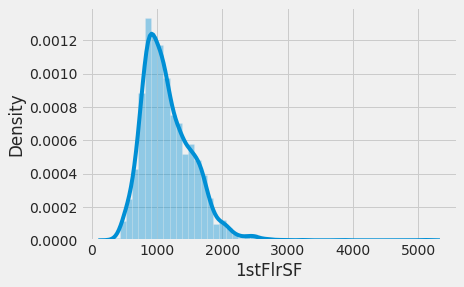

In [58]:
# 展示'1stFlrSF'的直方图与连续概率密度估计
sns.distplot(all_data['1stFlrSF'])

In [59]:
all_data['1stFlrSF'].skew(),all_data['1stFlrSF'].kurtosis()

(1.2579329323447708, 5.075292766543552)

In [60]:
def fixing_skewness(df):
    """
    This function takes in a dataframe and return fixed skewed dataframe
    """
    ## Import necessary modules 
    from scipy.stats import skew
    from scipy.special import boxcox1p
    from scipy.stats import boxcox_normmax
    
    ## Getting all the data that are not of "object" type. 
    numeric_feats = df.dtypes[df.dtypes != "object"].index

    # Check the skew of all numerical features
    skewed_feats = df[numeric_feats].apply(lambda x: x.skew()).sort_values(ascending=False)
    high_skew = skewed_feats[abs(skewed_feats) > 0.5]
    skewed_features = high_skew.index
    
    # 修正
    for feat in skewed_features:
        # 这里的+1只是确保非负，没有其他含义
        df[feat] = boxcox1p(df[feat], boxcox_normmax(df[feat] + 1))

fixing_skewness(all_data)

<AxesSubplot:xlabel='1stFlrSF', ylabel='Density'>

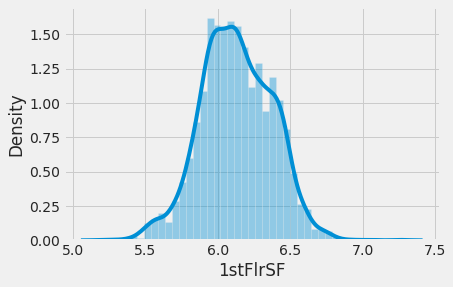

In [61]:
sns.distplot(all_data['1stFlrSF'])

In [62]:
all_data['1stFlrSF'].skew(),all_data['1stFlrSF'].kurtosis()

(-0.007826130433879426, 0.03729063396666721)

In [63]:
# feture engineering a new feature "TotalFS"
all_data['TotalSF'] = (all_data['TotalBsmtSF'] 
                       + all_data['1stFlrSF'] 
                       + all_data['2ndFlrSF'])

all_data['YrBltAndRemod'] = all_data['YearBuilt'] + all_data['YearRemodAdd']

all_data['Total_sqr_footage'] = (all_data['BsmtFinSF1'] 
                                 + all_data['BsmtFinSF2'] 
                                 + all_data['1stFlrSF'] 
                                 + all_data['2ndFlrSF']
                                )
                                 

all_data['Total_Bathrooms'] = (all_data['FullBath'] 
                               + (0.5 * all_data['HalfBath']) 
                               + all_data['BsmtFullBath'] 
                               + (0.5 * all_data['BsmtHalfBath'])
                              )
                               
all_data['Total_porch_sf'] = (all_data['OpenPorchSF'] 
                              + all_data['3SsnPorch'] 
                              + all_data['EnclosedPorch'] 
                              + all_data['ScreenPorch'] 
                              + all_data['WoodDeckSF']
                             )

In [64]:
all_data['haspool'] = all_data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
all_data['has2ndfloor'] = all_data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasgarage'] = all_data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasbsmt'] = all_data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasfireplace'] = all_data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [65]:
all_data = all_data.drop(['Utilities', 'Street', 'PoolQC'], axis=1)
all_data.shape

(2917, 86)

In [66]:
X_train,X_test = all_data.iloc[:train.shape[0],:],all_data.iloc[train.shape[0]:,:]

In [67]:
outliers = [30, 88, 462, 631, 1322]
X_train = X_train.drop(X_train.index[outliers])
y = y.drop(y.index[outliers])

In [68]:
# 统计值
for i in X_train.columns:
    counts = X_train[i].value_counts()
    print (counts)

20     533
60     297
50     143
120     87
30      69
160     63
70      59
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
RL         1146
RM          218
FV           65
RH           16
C (all)       8
Name: MSZoning, dtype: int64
17.840337    142
19.692956     70
21.443061     69
15.860626     56
20.579605     52
            ... 
25.626052      1
31.731183      1
33.173873      1
31.864058      1
26.530594      1
Name: LotFrontage, Length: 132, dtype: int64
13.480169    25
14.117918    24
13.084299    17
14.383736    14
13.973432    14
             ..
14.017434     1
15.074453     1
15.070297     1
15.808335     1
15.369832     1
Name: LotArea, Length: 1068, dtype: int64
None    1363
Grvl      50
Pave      40
Name: Alley, dtype: int64
Reg    922
IR1    481
IR2     41
IR3      9
Name: LotShape, dtype: int64
Lvl    1306
Bnk      61
HLS      50
Low      36
Name: LandContour, dtype: int64
Inside     1047
Corner     

6.088025       6
875.759054     5
143.594788     4
5.962002       3
889.541086     3
              ..
1181.102790    1
84.419560      1
421.040850     1
1162.831495    1
804.447040     1
Name: Total_sqr_footage, Length: 1403, dtype: int64
2.000000    232
1.000000    224
1.993440    208
2.534418    200
2.993440    163
3.527858    126
1.534418     99
2.527858     68
1.355448     28
2.355448     21
3.534418     11
1.889866     11
3.000000      8
2.889866      7
3.993440      6
3.978051      5
3.348887      5
4.527858      4
3.118598      3
2.474046      2
2.512469      2
3.096649      2
3.512469      2
3.889866      2
2.348887      2
1.348887      1
2.571821      1
1.690420      1
5.956972      1
1.527858      1
1.978051      1
3.112038      1
2.118598      1
0.993440      1
2.978051      1
4.467486      1
5.096649      1
Name: Total_Bathrooms, dtype: int64
0.000000     254
9.643047      12
31.064436     12
9.105438      12
38.723951      9
            ... 
29.262647      1
48.746803     

In [69]:
# 删除接近于常量的变量
def overfit_reducer(df):
    """
    This function takes in a dataframe and returns a list of features that are overfitted.
    """
    overfit = []
    for i in df.columns:
        counts = df[i].value_counts()
        zeros = counts.iloc[0]
        if zeros / len(df) * 100 > 95:
            overfit.append(i)
    overfit = list(overfit)
    return overfit


overfitted_features = overfit_reducer(X_train)
print(overfitted_features)
X_train = X_train.drop(overfitted_features, axis=1)
X_test = X_test.drop(overfitted_features, axis=1)

['Condition2', 'RoofMatl', 'Heating', 'LowQualFinSF', 'KitchenAbvGr', '3SsnPorch', 'PoolArea', 'MiscFeature', 'MiscVal', 'haspool', 'hasbsmt']


In [70]:
X_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)
X_train.shape,X_train.index

((1453, 75), RangeIndex(start=0, stop=1453, step=1))

In [71]:
# 这里要拼接的原因是X_test中某些特征的类别在X_train中不全
X = pd.concat([X_train,X_test],axis=0)

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model,layers,optimizers,metrics,losses

import sys
sys.setrecursionlimit(100000)

In [73]:
# 为了后面网络的构建，想要类别型特征的输入在前面，连续型特征的输入在后面
cat_features = X_train.dtypes[X_train.dtypes == 'object'].index
num_features = X_train.dtypes[X_train.dtypes != 'object'].index
cat_features.size,num_features.size

(39, 36)

In [74]:
def prepare_input(X,X_train):
    X_train_enco,X_test_enco = list(),list()
    # 类别型特征
    for var in cat_features:
        le = LabelEncoder()
        X_ = le.fit_transform(X.loc[:,var])
        
        train_enco = X_[:len(X_train)]
        test_enco = X_[len(X_train):]
        # 添加
        X_train_enco.append(train_enco)
        X_test_enco.append(test_enco)
    # 数值型变量-这里我采用了归一化
    for var in num_features:
#         mm = MinMaxScaler()
#         X_ = mm.fit_transform(X.loc[:,var])
        train_enco = X.loc[:,var][:len(X_train)]
        test_enco = X.loc[:,var][len(X_train):]
        # 添加
        X_train_enco.append(train_enco)
        X_test_enco.append(test_enco)
    return X_train_enco,X_test_enco

In [75]:
# 准备输入数据
X_train_enco,X_test_enco = prepare_input(X_train,X_test)
len(X_train_enco)
y = y.values.reshape((len(y), 1))

In [76]:
label_num = [len(set(X_train_enco[i])) for i in range(39)]
print(label_num)

[15, 5, 3, 4, 4, 5, 3, 25, 9, 5, 8, 6, 15, 16, 4, 4, 5, 6, 5, 5, 5, 7, 7, 5, 2, 5, 4, 7, 6, 7, 4, 6, 6, 3, 5, 12, 5, 9, 6]


In [90]:
import numpy as np
input_layer = []
em_layer = []

for i in range(len(X_train_enco)):
    if i < 39:
        # 种类
        n_labels = len(np.unique(X_train_enco[i]))
        # 输入
        inp = layers.Input(shape=(1,))
        em = layers.Embedding(n_labels,6)(inp)
        em = layers.Reshape(target_shape=(6,))(em)
        input_layer.append(inp)
        em_layer.append(em)
    else:
        inp = layers.Input(shape=(1,))
#         inp = layers.BatchNormalization()(inp)
        dense = layers.Dense(6)(inp)
        input_layer.append(inp)
        em_layer.append(dense)

    
# 合并
x = layers.Concatenate()(em_layer)
x = layers.BatchNormalization()(x)
x = layers.Dense(32,activation = 'relu')(x)
x = layers.Dropout(0.1)(x)
output = layers.Dense(1)(x)

model = keras.Model(inputs=input_layer, outputs=output)

In [91]:
len(X_train_enco)

75

In [94]:
type(y)

numpy.ndarray

In [93]:
model.compile(optimizer=optimizers.Adam(learning_rate=0.01),
             loss='mse',
             metrics=[tf.keras.metrics.AUC(name='auc')])
model.fit(X_train_enco, y, epochs=2, batch_size=16, verbose=1)

Epoch 1/2


InvalidArgumentError:  assertion failed: [predictions must be >= 0] [Condition x >= y did not hold element-wise:] [x (functional_3/dense_75/BiasAdd:0) = ] [[-nan][-nan][-nan]...] [y (Cast_2/x:0) = ] [0]
	 [[{{node assert_greater_equal/Assert/AssertGuard/else/_1/assert_greater_equal/Assert/AssertGuard/Assert}}]] [Op:__inference_train_function_22090]

Function call stack:
train_function


In [98]:
model.compile(optimizer=optimizers.Adam(learning_rate=0.01),
             loss='mse')
model.fit(X_train_enco, y, epochs=2, batch_size=16, verbose=1)

Epoch 1/2
91/91 [==============================] - 1s 10ms/step - loss: nan
Epoch 2/2
91/91 [==============================] - 1s 9ms/step - loss: nan
